In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/15/2019 11:06:51 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 11:06:53 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 11:06:55 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-nonmusic_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 11:06:57 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-music

In [6]:
dtfa.normalize_activations()

[tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(6.2937),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690),
 tensor(5.8690

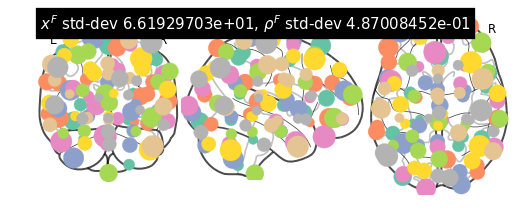

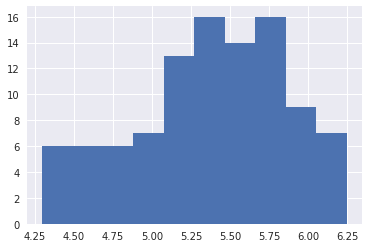

(<nilearn.plotting.displays.OrthoProjector at 0x7fc2221c8a58>,
 tensor([[-3.7249e+01, -9.2776e+01, -1.1913e+01],
         [ 5.3155e+01,  1.6267e+01, -2.6221e+00],
         [-8.0959e-01,  4.0323e+01,  1.2473e+01],
         [-1.9421e+01, -3.2067e+01,  3.9884e+01],
         [ 2.1823e+01, -5.2750e+01, -5.7991e+01],
         [ 4.5790e+01, -5.2137e+01,  5.5398e+01],
         [-2.6360e+01, -3.6781e+01, -3.1058e+01],
         [ 6.6479e-01,  3.4410e+01,  6.8035e+01],
         [-2.9292e+01, -4.7900e+00,  5.1200e+00],
         [ 2.6277e+01, -5.0993e+01,  1.6924e+01],
         [ 2.1384e+01, -6.0106e+01, -1.0142e+01],
         [ 5.0565e+01,  1.7083e+00,  5.2505e+01],
         [-4.7641e+01, -4.7060e+01,  6.0736e+01],
         [ 9.1955e+00, -7.4496e+01,  6.5383e+01],
         [-2.3146e+01, -9.1587e+00,  3.1756e+01],
         [-5.2254e+01,  4.3356e+01, -8.5386e+00],
         [ 3.3729e+01,  6.5584e+01,  1.3810e+01],
         [ 4.1277e+01, -8.7829e+01,  1.6114e+01],
         [ 4.7204e+01,  4.6419e+01,  

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
losses = dtfa.train(num_steps=500, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12, patience=100)

01/15/2019 11:13:50 [Epoch 1] (36008ms) Posterior free-energy 1.03064390e+09 = KL from prior 3.00181200e+06 - log-likelihood -1.02764211e+09
01/15/2019 11:13:50 Saving checkpoint...
01/15/2019 11:14:25 [Epoch 2] (35248ms) Posterior free-energy 9.89749312e+08 = KL from prior 2.80648775e+06 - log-likelihood -9.86942720e+08
01/15/2019 11:15:00 [Epoch 3] (34982ms) Posterior free-energy 9.59537408e+08 = KL from prior 2.76572025e+06 - log-likelihood -9.56771648e+08
01/15/2019 11:15:36 [Epoch 4] (36068ms) Posterior free-energy 9.38728448e+08 = KL from prior 2.75741375e+06 - log-likelihood -9.35971072e+08
01/15/2019 11:16:12 [Epoch 5] (35164ms) Posterior free-energy 9.25466176e+08 = KL from prior 2.75412975e+06 - log-likelihood -9.22712128e+08
01/15/2019 11:16:47 [Epoch 6] (34989ms) Posterior free-energy 9.16459520e+08 = KL from prior 2.74432950e+06 - log-likelihood -9.13715264e+08
01/15/2019 11:17:22 [Epoch 7] (35389ms) Posterior free-energy 9.11416192e+08 = KL from prior 2.74841975e+06 - log

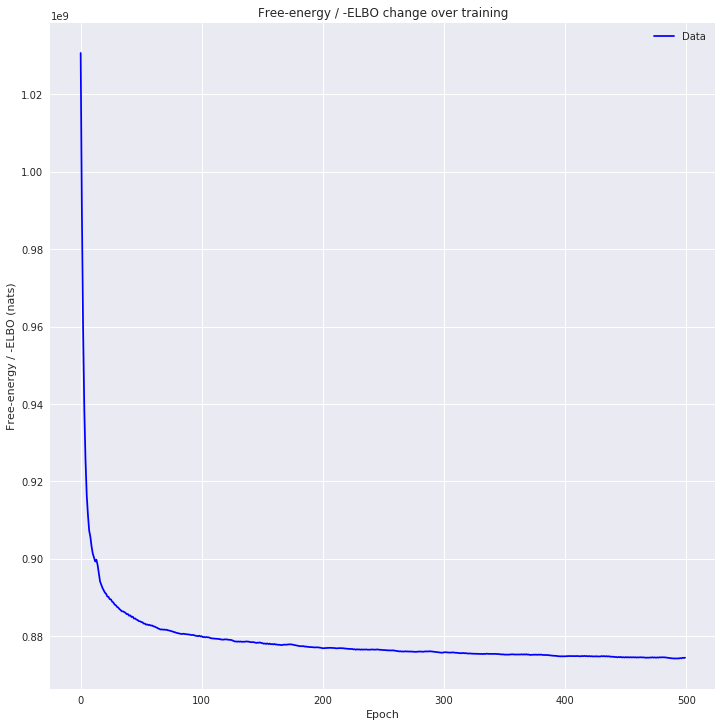

In [10]:
utils.plot_losses(losses)

In [11]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [12]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [13]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

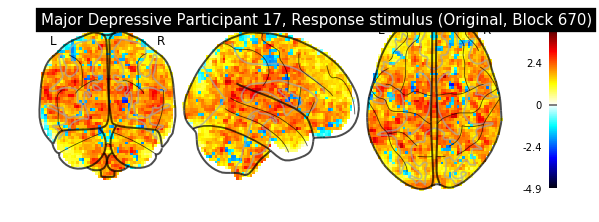

01/15/2019 15:54:47 Reconstruction Error (Frobenius Norm): 1.94146194e+02 out of 2.51173599e+02


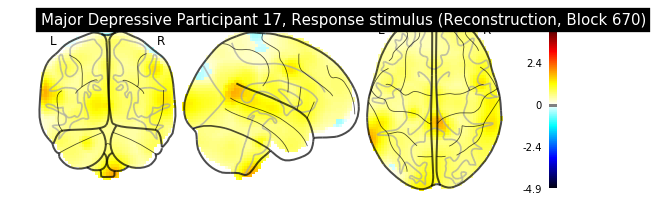

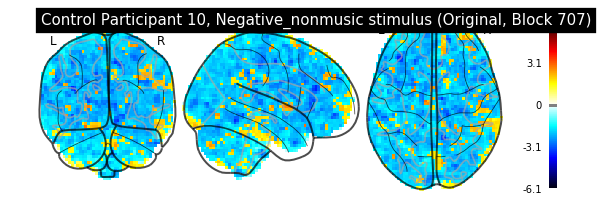

01/15/2019 15:54:49 Reconstruction Error (Frobenius Norm): 6.82888977e+02 out of 9.40791382e+02


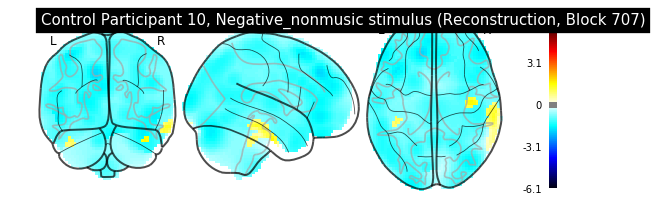

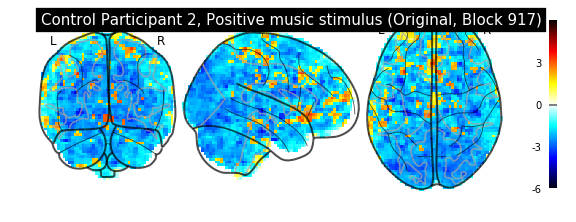

01/15/2019 15:54:52 Reconstruction Error (Frobenius Norm): 7.04090942e+02 out of 8.55607117e+02


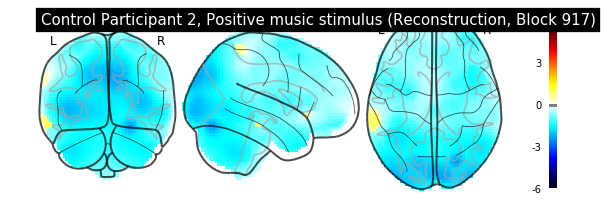

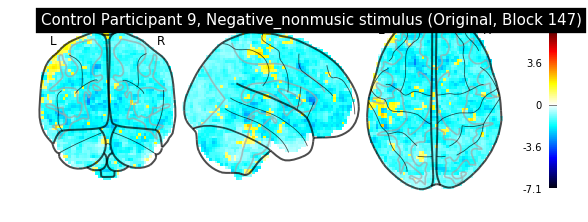

01/15/2019 15:54:54 Reconstruction Error (Frobenius Norm): 4.59607208e+02 out of 5.48489807e+02


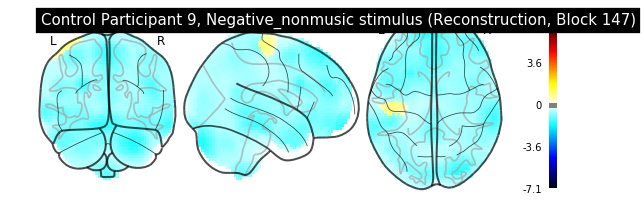

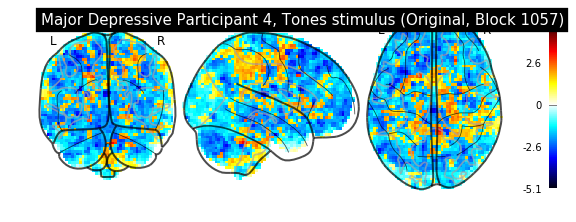

01/15/2019 15:54:57 Reconstruction Error (Frobenius Norm): 6.20387390e+02 out of 7.37579041e+02


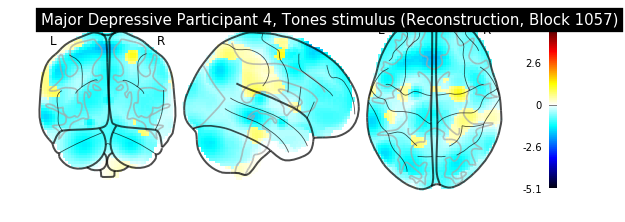

In [14]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


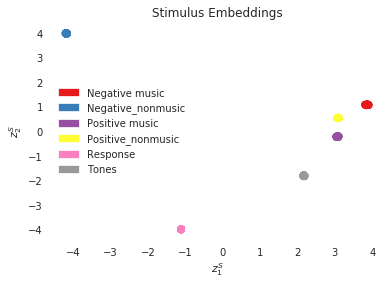

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


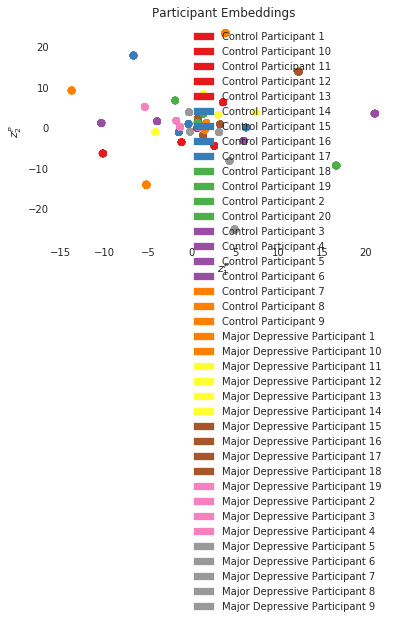

In [16]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

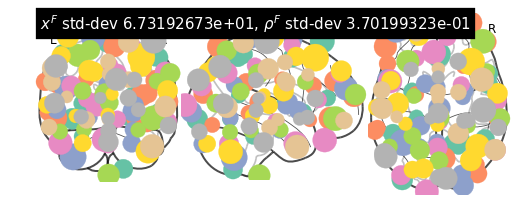

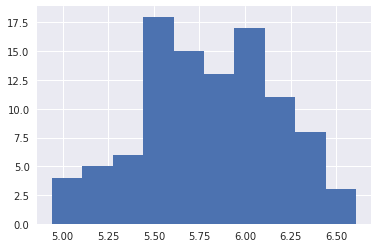

(<nilearn.plotting.displays.OrthoProjector at 0x7fc1f5f85588>,
 tensor([[-3.7682e+01, -9.5576e+01, -9.7197e+00],
         [ 5.3574e+01,  1.5613e+01, -2.4825e+00],
         [-4.2285e-01,  4.1390e+01,  1.2777e+01],
         [-2.2714e+01, -2.9679e+01,  3.8521e+01],
         [ 1.5782e+01, -5.7954e+01, -6.2413e+01],
         [ 4.9300e+01, -5.2885e+01,  5.5642e+01],
         [-2.8234e+01, -3.6957e+01, -2.8211e+01],
         [ 2.3367e-01,  3.5902e+01,  7.2745e+01],
         [-2.7283e+01, -3.0242e+00,  6.4070e+00],
         [ 2.4887e+01, -5.1988e+01,  1.5409e+01],
         [ 2.1251e+01, -6.1065e+01, -9.0305e+00],
         [ 5.3053e+01,  4.2737e+00,  5.4956e+01],
         [-4.7501e+01, -4.7358e+01,  5.8816e+01],
         [ 6.4744e+00, -7.3476e+01,  6.6867e+01],
         [-2.3289e+01, -5.9969e+00,  3.2057e+01],
         [-5.5429e+01,  4.4364e+01, -8.6248e+00],
         [ 3.4768e+01,  6.9206e+01,  1.4963e+01],
         [ 4.1436e+01, -8.9352e+01,  1.6803e+01],
         [ 5.0260e+01,  4.9269e+01,  

In [17]:
dtfa.visualize_factor_embedding()

In [18]:
dtfa.average_reconstruction_error()

01/15/2019 15:57:14 Average reconstruction error (MSE): 6.73895944e-01
01/15/2019 15:57:14 Average data norm (Euclidean): 9.55792772e-01
01/15/2019 15:57:14 Percent average reconstruction error: 0.274573


(0.6738959440862403, 0.9557927715365993, 0.002745727645661687)

In [19]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


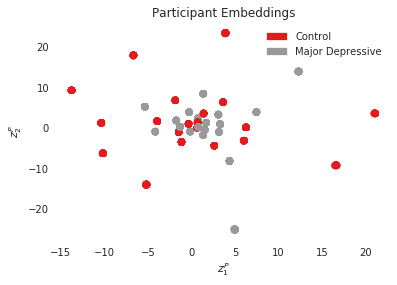

In [20]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)